# Trabajo en clase 06
## Métodos de Monte Carlo
### Jose Javier Fernández González

- Realice las actividades que se le indican en los espacios disponibles. 
- Debe entregar una copia de este cuaderno en el espacio habilitado el tecDigital para el trabajo en clase 06.
- **Valor total 9 puntos**.
- Puede agregar celdas de texto o código si lo considera necesario.
- Use nombres descriptivos para las variables y las funciones que defina. 
- Agregue todos los comentarios que considere necesarios para mejorar la comprensión del código.

## Estimación de $\pi$

<div>
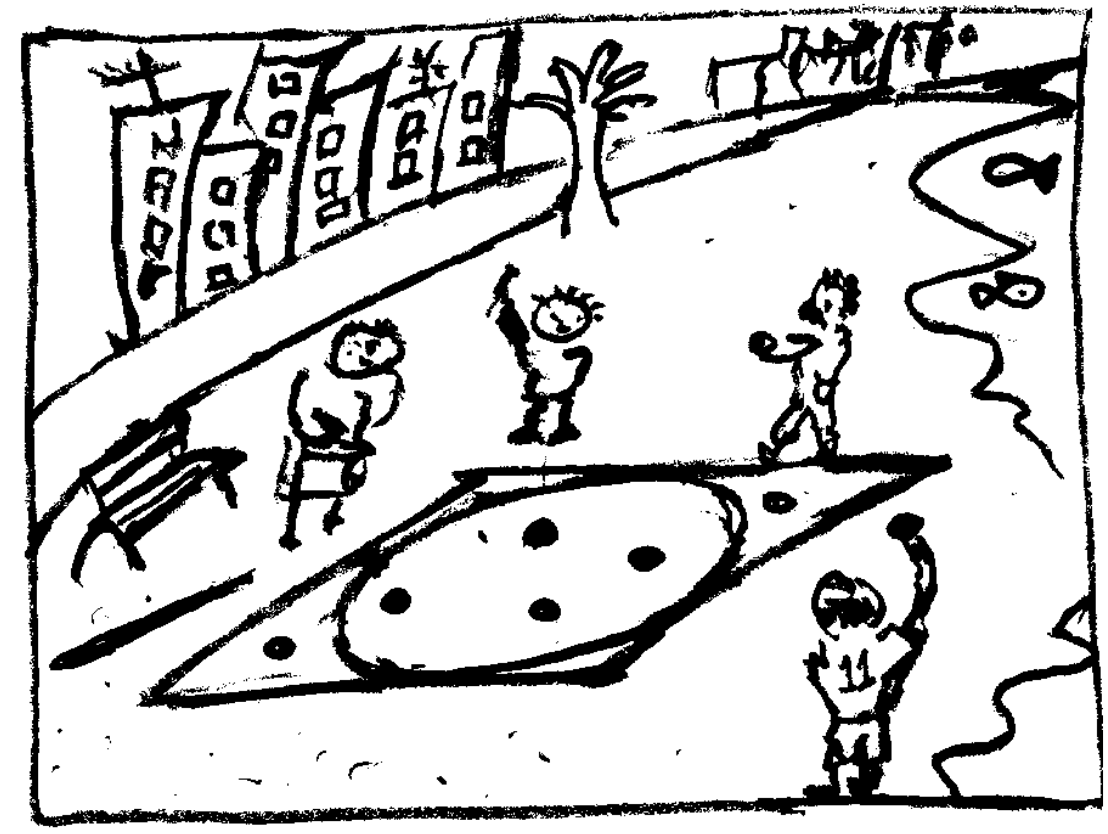
</div>

- El valor de $\pi$ puede calcularse por medio de un muestreo de valores de una distribución uniforme de números aleatorios. 
- Como un juego de niños en una playa, el truco es lanzar piedras aleatoriamente a un área cuadrada y verificar cuáles caen dentro de un círculo. La razón entre la cantidad de piedras lanzadas y las que caen dentro del círculo se usa para estimar el valor de $\pi$.

1. Defina dos variables _nTiros_ y _nAciertos = 0_. Estas variables almacenarán la cantidad de muestras que se tomarán de la distribución uniforme y la cantidad de aciertos. Puede crear una función que tenga _nTiros_ como parámetro de entrada.
2. Genere un ciclo que itere desde 0 hasta _nTiros_. 
3. Para cada iteración obtenga dos valores aleatorios (las coordenadas _x_ y _y_ de la piedra lanzada aleatoriamente según la analogía) de una distribución uniforme entre 0 y 1.
4. Evalúe si la posición aleatoria cae dentro de un cuarto de círculo con radio 1. Si el lanzamiento cae dentro del cuarto de círculo sume uno a _nAciertos_, si no, continue con las iteraciones.
5. Una vez finalizado el ciclo calcule la razón  entre _nAciertos_ y _nTiros_.
6. Estime $\pi$ como cuatro veces la razón entre _nAciertos_ y _nTiros_. Note que para un cuadrado de lado 2r su área es $4r^2$, si se toma un cuarto del cuadrado: $A_{cuadrado} = r^2$. El área de un círculo inscrito dentro del cuadrado es: $\pi r^2$, si se toma un cuarto del circulo: $A_{círculo} = \dfrac{\pi}{4}r^2$
            
$$
\Rightarrow \dfrac{A_c}{A_{cuadrado}} = \dfrac{nAciertos}{nTiros}= \dfrac{\pi}{4}
$$

**5 puntos**

In [1]:
# Librerías
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Estimación de pi
def estimacionPI(nTiros):
    nAciertos = 0
    
    for i in range(nTiros+1):
        posicion = np.random.uniform(0,1,(1,2))
        r = np.sqrt(posicion[0,0]**2 + posicion[0,1]**2)
        
        if r <= 1:
            nAciertos += 1
            
    return 4*nAciertos/nTiros


7. Use la función anterior para estimar $\pi$ con _nTiros_ = 4,8, ... , 1024. 
8. Para cada valor de _nTiros_ estime el valor de $\pi$ _10_ veces. Tome como resultado final el promedio de los valores obtenidos. Calcule el porcentaje de error entre la estimación de $\pi$ y el valor exacto.
9. Finalmente, genere un gráfico de _nTiros_ vs $\%_{error}$. **4 puntos**

In [8]:
# Estimación de Valores de pi

errores = []
x = []

for n in range(2,11):
    
    nTiros = 2**n
    x.append(nTiros)
    
    valor = 0

    for i in range(11):
        valor += estimacionPI(nTiros)
    
    valor_promedio = valor/10
    
    error = np.abs(valor_promedio-np.pi)/np.pi *100
    errores.append(error)

        
        

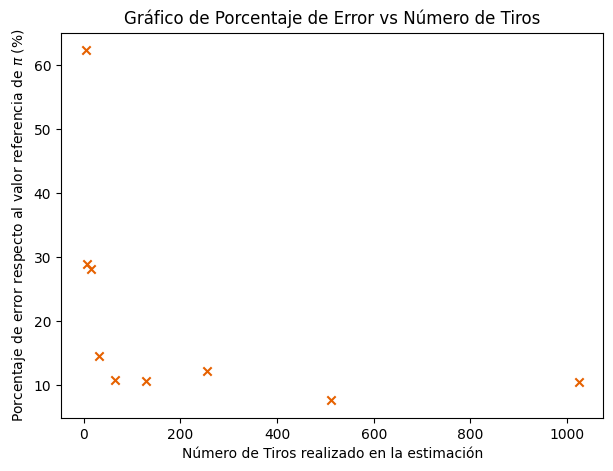

In [9]:
# Gráfico nTiros vs porcentaje de error
fig, ax = plt.subplots(figsize=(7,5))
plt.scatter(x,errores, color="#e66100", marker="x")
plt.title("Gráfico de Porcentaje de Error vs Número de Tiros")
plt.xlabel("Número de Tiros realizado en la estimación")
plt.ylabel("Porcentaje de error respecto al valor referencia de $\pi$ (%)")
plt.show()
